In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

In [2]:
data=pd.read_csv('E-Scooter_Trips_20231021.csv')

In [3]:
data.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,17553846-c8d6-b9de-1755-3846c8d6b9de,05/28/2022 02:00:00 PM,05/28/2022 03:00:00 PM,2484,1544,Lyft,32.0,32.0,Loop,Loop,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445)
1,1756d4dc-ccf1-af42-1756-d4dcccf1af42,05/29/2022 07:00:00 PM,05/29/2022 08:00:00 PM,36,135,Lyft,32.0,32.0,Loop,Loop,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445)
2,1756d578-f376-9950-1756-d578f3769950,05/29/2022 08:00:00 PM,05/29/2022 08:00:00 PM,2653,1972,Lyft,32.0,NaN,Loop,NaN,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),NaN,NaN,NaN
3,1756fc61-f058-c200-1756-fc61f058c200,05/29/2022 10:00:00 PM,05/29/2022 10:00:00 PM,105,137,Lyft,32.0,NaN,Loop,NaN,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),NaN,NaN,NaN
4,17659074-0cfd-92ca-1765-90740cfd92ca,06/10/2022 12:00:00 AM,06/10/2022 12:00:00 AM,2299,540,Lyft,8.0,24.0,Near North Side,West Town,41.899602,-87.633309,POINT (-87.63330943703569 41.899602106426094),41.901207,-87.676357,POINT (-87.67635712603905 41.90120673431551)


In [4]:
data.shape

(2384001, 16)

In [5]:
#Checking data types of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384001 entries, 0 to 2384000
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Trip ID                      object 
 1   Start Time                   object 
 2   End Time                     object 
 3   Trip Distance                int64  
 4   Trip Duration                int64  
 5   Vendor                       object 
 6   Start Community Area Number  float64
 7   End Community Area Number    float64
 8   Start Community Area Name    object 
 9   End Community Area Name      object 
 10  Start Centroid Latitude      float64
 11  Start Centroid Longitude     float64
 12  Start Centroid Location      object 
 13  End Centroid Latitude        float64
 14  End Centroid Longitude       float64
 15  End Centroid Location        object 
dtypes: float64(6), int64(2), object(8)
memory usage: 291.0+ MB


In [6]:
# to help identify outliers, we calculate the speed (m/s) 
data['Speed']=data['Trip Distance'] / data['Trip Duration']

In [7]:
data['Start Time']= data['Start Time'].astype('datetime64')

In [8]:
data['date']=data['Start Time'].dt.date
data['date']= data['date'].astype('datetime64')

In [9]:
data['weekday'] = data['Start Time'].dt.dayofweek + 1


In [10]:
def func_in_out(df):
    df['in_out'] = (df['Start Community Area Number'] != df['End Community Area Number']).astype(int)
    return df

In [11]:
data=func_in_out(data)

In [12]:
data.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Speed,date,weekday,in_out
0,17553846-c8d6-b9de-1755-3846c8d6b9de,2022-05-28 14:00:00,05/28/2022 03:00:00 PM,2484,1544,Lyft,32.0,32.0,Loop,Loop,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),1.608808,2022-05-28,6,0
1,1756d4dc-ccf1-af42-1756-d4dcccf1af42,2022-05-29 19:00:00,05/29/2022 08:00:00 PM,36,135,Lyft,32.0,32.0,Loop,Loop,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),0.266667,2022-05-29,7,0
2,1756d578-f376-9950-1756-d578f3769950,2022-05-29 20:00:00,05/29/2022 08:00:00 PM,2653,1972,Lyft,32.0,NaN,Loop,NaN,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),NaN,NaN,NaN,1.345335,2022-05-29,7,1
3,1756fc61-f058-c200-1756-fc61f058c200,2022-05-29 22:00:00,05/29/2022 10:00:00 PM,105,137,Lyft,32.0,NaN,Loop,NaN,41.878866,-87.625192,POINT (-87.62519186960115 41.87886594636445),NaN,NaN,NaN,0.766423,2022-05-29,7,1
4,17659074-0cfd-92ca-1765-90740cfd92ca,2022-06-10 00:00:00,06/10/2022 12:00:00 AM,2299,540,Lyft,8.0,24.0,Near North Side,West Town,41.899602,-87.633309,POINT (-87.63330943703569 41.899602106426094),41.901207,-87.676357,POINT (-87.67635712603905 41.90120673431551),4.257407,2022-06-10,5,1


In [13]:
data.describe()

,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Speed,weekday,in_out
count,2.384001e+06,2.384001e+06,2.382388e+06,2.381531e+06,2.382388e+06,2.382388e+06,2.381531e+06,2.381531e+06,2.383970e+06,2.384001e+06,2.384001e+06
mean,2.508610e+03,8.869162e+02,2.602332e+01,2.600158e+01,4.188289e+01,-8.766323e+01,4.188303e+01,-8.766346e+01,inf,4.066822e+00,4.114663e-01
std,1.368699e+05,1.118870e+03,1.868055e+01,1.870546e+01,6.240065e-02,4.236533e-02,6.252722e-02,4.266433e-02,NaN,1.927031e+00,4.920995e-01
min,0.000000e+00,-2.896000e+03,1.000000e+00,1.000000e+00,4.166014e+01,-8.789370e+01,4.166014e+01,-8.789370e+01,-5.926900e+04,1.000000e+00,0.000000e+00
25%,8.310000e+02,2.880000e+02,8.000000e+00,8.000000e+00,4.187401e+01,-8.767636e+01,4.187401e+01,-8.768384e+01,1.886136e+00,2.000000e+00,0.000000e+00
50%,1.635000e+03,5.300000e+02,2.400000e+01,2.400000e+01,4.189960e+01,-8.765631e+01,4.189960e+01,-8.765631e+01,3.186693e+00,4.000000e+00,0.000000e+00
75%,2.976000e+03,1.008000e+03,3.200000e+01,3.200000e+01,4.192269e+01,-8.763331e+01,4.192269e+01,-8.763331e+01,4.181729e+00,6.000000e+00,1.000000e+00
max,2.095658e+08,2.499600e+04,7.700000e+01,7.700000e+01,4.200962e+01,-8.753490e+01,4.200962e+01,-8.753490e+01,inf,7.000000e+00,1.000000e+00


# Removing outliers



The maximum trip distance is of 20 000 km which is clearly way too high as the perimetre of the city is around 152 km.
Crossing chicago diagonally, from the northwest to the southeast of the city, means covering a distance of around 50 km ; we will consider that all trips above that value are outliers.
Minimal trip distance is of 0, will also remove journeys with a distance of less than 100m as this type of journey won't make sense in our analysis.

We oberserve some negative trip durations, we will remove trips durations that are under 2 minutes. The maximum of trip duration is of 41 minutes which seems correct. 

In [14]:
min_dist = 500 # min 500m
max_dist = 50000 # max 50 km
min_dur = 120 # min 2 min


data = data[(data['Trip Distance'] >= min_dist) & (data['Trip Distance'] <= max_dist) & (data['Trip Duration'] >= min_dur) ]

In [15]:
data[data['Trip Distance'] < min_dist]
data[data['Trip Distance'] > max_dist]
data[data['Trip Duration'] < min_dur]

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Speed,date,weekday,in_out


In [16]:
# minimal speed is still very low and maximum speed crazy high (1 123 km/h)
# in addition, we will remove all trips with speed under 1 m/s and above 8.9 m/s (32 km/h)
min_speed=1
max_speed=8.9

data = data[(data['Speed'] >= min_speed) & (data['Speed'] <= max_speed) ]

In [17]:
#Number of attributes and data points
data.shape

(1926586, 20)

We removed 2,384,001 - 1,926,586 = 457,415 trips

# DATA CLEANING

In [18]:
#Checking for null values in the dataset
data.isnull().sum()

Trip ID                           0
Start Time                        0
End Time                          0
Trip Distance                     0
Trip Duration                     0
Vendor                            0
Start Community Area Number    1315
End Community Area Number      2011
Start Community Area Name      1315
End Community Area Name        2011
Start Centroid Latitude        1315
Start Centroid Longitude       1315
Start Centroid Location        1315
End Centroid Latitude          2011
End Centroid Longitude         2011
End Centroid Location          2011
Speed                             0
date                              0
weekday                           0
in_out                            0
dtype: int64

In [19]:
#Checking to see if these values are missing from a same date or different dates
data[data['Start Community Area Number'].isnull()==True]['date'].value_counts()

2023-06-10    16
2023-06-23    15
2022-09-02    14
2023-06-21    14
2023-06-30    13
              ..
2022-12-13     1
2022-12-14     1
2023-05-14     1
2023-04-08     1
2023-05-18     1
Name: date, Length: 260, dtype: int64

In [20]:
#Since the values are missing from different dates, we need to understand the frequency of data collected 
#or the number of data points collected on a single day
print('Number of data points for 2023-06-10:')
data[data['date']=='2023-06-10']['date'].count()

Number of data points for 2023-06-10


10167

In [21]:
#Since the count of null values is very small for a each day, removing them should not affect our data analysis
clean_data= data.dropna()

In [22]:
# we only keep data for one entire year; we take data from 2022-07-01 to 2023-06-30
clean_data[clean_data['Start Time'] < '2022-07-01 00:00:00']

clean_data = clean_data[(clean_data['Start Time'] >= '2022-07-01 00:00:00') & (clean_data['Start Time'] <= '2023-06-30 23:59:59') ]

In [23]:
clean_data[clean_data['Start Time'] < '2022-07-01 00:00:00']
df=clean_data

# Weather Data

In [24]:
#Importing weather data from Chicago
weather=pd.read_csv('chicago 2022-05-10 to 2023-06-30.csv')

In [25]:
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2022-05-10,91.1,70.5,80.3,95.0,70.5,82.1,65.2,61.0,...,11.2,6,15,2022-05-10T05:35:38,2022-05-10T19:58:57,0.32,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,chicago,2022-05-11,90.3,76.3,82.4,97.1,76.3,85.2,69.1,64.7,...,12.0,6,10,2022-05-11T05:34:31,2022-05-11T20:00:00,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2,chicago,2022-05-12,93.0,75.1,84.4,92.0,75.1,84.0,59.3,46.2,...,12.9,7,10,2022-05-12T05:33:26,2022-05-12T20:01:02,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
3,chicago,2022-05-13,91.6,70.7,81.8,88.0,70.7,80.5,49.5,33.6,...,12.9,8,10,2022-05-13T05:32:23,2022-05-13T20:02:04,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,chicago,2022-05-14,84.2,69.1,76.7,83.2,69.1,76.5,56.6,50.8,...,9.8,7,10,2022-05-14T05:31:21,2022-05-14T20:03:05,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              417 non-null    object 
 1   datetime          417 non-null    object 
 2   tempmax           417 non-null    float64
 3   tempmin           417 non-null    float64
 4   temp              417 non-null    float64
 5   feelslikemax      417 non-null    float64
 6   feelslikemin      417 non-null    float64
 7   feelslike         417 non-null    float64
 8   dew               417 non-null    float64
 9   humidity          417 non-null    float64
 10  precip            417 non-null    float64
 11  precipprob        417 non-null    int64  
 12  precipcover       417 non-null    float64
 13  preciptype        210 non-null    object 
 14  snow              417 non-null    float64
 15  snowdepth         417 non-null    float64
 16  windgust          417 non-null    float64
 1

In [27]:
weather.describe() 

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,63.906475,48.239568,55.964508,62.370024,44.501918,53.220144,41.613669,61.547962,0.071652,35.971223,...,15.610072,177.442446,1015.873381,64.135252,9.289209,86.293285,7.430216,4.570743,15.467626,0.481367
std,20.272877,18.205276,18.990308,23.184044,22.569199,22.745234,16.802157,12.932051,0.195245,48.049245,...,4.372812,101.017973,7.082049,26.994302,1.322822,55.171459,4.773761,2.746573,15.668886,0.288077
min,-0.800000,-8.700000,-4.300000,-23.200000,-34.900000,-28.900000,-13.200000,31.700000,0.000000,0.000000,...,7.200000,0.800000,994.200000,2.300000,1.700000,5.500000,0.400000,0.000000,10.000000,0.000000
25%,46.700000,34.400000,40.100000,42.900000,26.800000,34.200000,29.200000,52.300000,0.000000,0.000000,...,12.300000,73.300000,1011.300000,44.300000,9.400000,40.000000,3.400000,2.000000,10.000000,0.250000
50%,67.900000,50.600000,59.200000,67.900000,50.600000,58.800000,41.600000,61.000000,0.000000,0.000000,...,15.100000,196.200000,1015.500000,67.700000,9.900000,72.700000,6.200000,4.000000,10.000000,0.470000
75%,81.600000,64.500000,73.000000,80.700000,64.500000,73.000000,56.600000,71.500000,0.027000,100.000000,...,18.000000,258.300000,1020.400000,88.400000,9.900000,132.300000,11.400000,7.000000,10.000000,0.750000
max,100.100000,83.100000,90.400000,106.700000,87.400000,94.100000,72.900000,95.400000,1.386000,100.000000,...,31.600000,357.600000,1036.200000,100.000000,9.900000,202.000000,17.400000,10.000000,100.000000,0.980000


In [28]:
#Dropping attributes from weather data which are not necessary
weather=weather.drop(['name', 'tempmax', 'tempmin', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'precipprob',
       'precipcover', 'windgust', 'winddir', 'sealevelpressure',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'snow','moonphase', 'description', 'icon', 'stations'],axis=1)

In [29]:
weather['datetime']=weather['datetime'].astype('datetime64')
weather['date']=weather['datetime'].dt.date
weather.drop('datetime',axis=1,inplace=True)

In [30]:
weather['date']=weather['date'].astype('datetime64')


# Socio-Demographic Data

In [31]:
#Reading socio-economic data of Chicago communities
socio_data= pd.read_csv('DATA_77_COMM_FINAL.csv')

In [32]:
socio_data

,Comm ID,COMMUNITY,Aire_km2,2020_POP,Density_POP,MEDINC,NUM_SUB_ST,NUM_BUS_ST,Length_Bike_Lanes
0,1,ROGERS PARK,4.762,55628,11681,51055.16872,4,97,11604
1,2,WEST RIDGE,9.144,77122,8434,58980.64250,0,195,6835
2,3,UPTOWN,6.047,57182,9456,61168.83117,3,170,15847
3,4,LINCOLN SQUARE,6.629,40494,6109,85435.59858,4,132,11883
4,5,NORTH CENTER,5.300,35114,6625,142107.21340,2,113,10607
...,...,...,...,...,...,...,...,...,...
72,73,WASHINGTON HEIGHTS,7.398,25065,3388,55427.50929,0,115,7106
73,74,MOUNT GREENWOOD,7.022,18628,2653,106537.59820,0,82,0
74,75,MORGAN PARK,8.536,21186,2482,66486.41319,0,88,3088
75,76,OHARE,34.545,13418,388,62264.04633,2,30,0


In [33]:
socio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    Comm  ID           77 non-null     int64  
 1   COMMUNITY           77 non-null     object 
 2   Aire_km2            77 non-null     float64
 3   2020_POP            77 non-null     int64  
 4   Density_POP         77 non-null     int64  
 5   MEDINC              77 non-null     float64
 6   NUM_SUB_ST          77 non-null     int64  
 7   NUM_BUS_ST          77 non-null     int64  
 8   Length_Bike_Lanes   77 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.5+ KB


In [34]:
#Checking for null values
socio_data.isnull().sum()

 Comm  ID             0
COMMUNITY             0
Aire_km2              0
2020_POP              0
Density_POP           0
MEDINC                0
NUM_SUB_ST            0
NUM_BUS_ST            0
Length_Bike_Lanes     0
dtype: int64

In [35]:
socio_data.drop(['COMMUNITY','Aire_km2','2020_POP','MEDINC'],axis=1,inplace=True)
socio_data.drop(index=76,inplace=True)

In [36]:
socio_data.rename(columns={' Comm  ID': 'Start Community Area Number'}, inplace=True)
socio_data

,Start Community Area Number,Density_POP,NUM_SUB_ST,NUM_BUS_ST,Length_Bike_Lanes
0,1,11681,4,97,11604
1,2,8434,0,195,6835
2,3,9456,3,170,15847
3,4,6109,4,132,11883
4,5,6625,2,113,10607
...,...,...,...,...,...
71,72,2428,0,68,3912
72,73,3388,0,115,7106
73,74,2653,0,82,0
74,75,2482,0,88,3088


# Destination Prediction Data

In [177]:
pred_destination=clean_data.copy()

In [178]:
pred_destination['hour'] = pred_destination['Start Time'].dt.hour
pred_destination['month'] = pred_destination['Start Time'].dt.month

In [179]:
pred_destination.columns

Index(['Trip ID', 'Start Time', 'End Time', 'Trip Distance', 'Trip Duration',
       'Vendor', 'Start Community Area Number', 'End Community Area Number',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'Start Centroid Location', 'End Centroid Latitude',
       'End Centroid Longitude', 'End Centroid Location', 'Speed', 'date',
       'weekday', 'in_out', 'hour', 'month'],
      dtype='object')

In [180]:
pred_destination.drop(['Trip ID', 'Start Time', 'End Time', 'Trip Distance', 'Trip Duration',
       'Vendor',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'Start Centroid Location', 'End Centroid Latitude',
       'End Centroid Longitude', 'End Centroid Location'], axis=1,inplace=True)

In [181]:
#Merging weather data and prediction dataset
pred_destination= pred_destination.merge(weather,on='date',how='left')

In [182]:
pred_destination= pred_destination.merge(socio_data, on='Start Community Area Number', how='left')


In [183]:
pred_destination

,Start Community Area Number,End Community Area Number,Speed,date,weekday,in_out,hour,month,temp,humidity,...,preciptype,snowdepth,windspeed,cloudcover,visibility,conditions,Density_POP,NUM_SUB_ST,NUM_BUS_ST,Length_Bike_Lanes
0,32.0,32.0,1.818182,2022-07-06,3,0,15,7,74.8,77.9,...,rain,0.0,13.8,88.9,9.2,"Rain, Partially cloudy",9826.0,16.0,154.0,11421.0
1,32.0,32.0,1.860123,2022-07-09,6,0,10,7,73.0,58.5,...,NaN,0.0,15.5,27.2,9.9,Partially cloudy,9826.0,16.0,154.0,11421.0
2,32.0,32.0,1.144882,2022-07-09,6,0,11,7,73.0,58.5,...,NaN,0.0,15.5,27.2,9.9,Partially cloudy,9826.0,16.0,154.0,11421.0
3,41.0,41.0,1.126735,2022-07-10,7,0,15,7,76.1,51.1,...,NaN,0.0,10.5,29.0,9.9,Partially cloudy,7030.0,0.0,97.0,4055.0
4,24.0,24.0,4.066277,2022-07-11,1,0,17,7,78.9,61.9,...,rain,0.0,15.8,70.0,9.9,"Rain, Partially cloudy",7407.0,4.0,287.0,30298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767545,56.0,57.0,5.182249,2023-06-30,5,1,23,6,80.1,69.3,...,rain,0.0,15.2,67.7,6.7,"Rain, Partially cloudy",3236.0,1.0,137.0,0.0
1767546,31.0,31.0,1.548932,2023-06-30,5,0,22,6,80.1,69.3,...,rain,0.0,15.2,67.7,6.7,"Rain, Partially cloudy",4455.0,4.0,153.0,12440.0
1767547,52.0,55.0,3.771360,2023-06-30,5,1,22,6,80.1,69.3,...,rain,0.0,15.2,67.7,6.7,"Rain, Partially cloudy",2809.0,0.0,74.0,8525.0
1767548,29.0,30.0,3.594558,2023-06-30,5,1,18,6,80.1,69.3,...,rain,0.0,15.2,67.7,6.7,"Rain, Partially cloudy",4185.0,4.0,198.0,18532.0


In [184]:
pred_destination=pred_destination.drop(['End Community Area Number','Speed','date','conditions','preciptype'],axis=1) # 


In [186]:
pred_destination=pred_destination.dropna()

# Exploratory Data Analysis

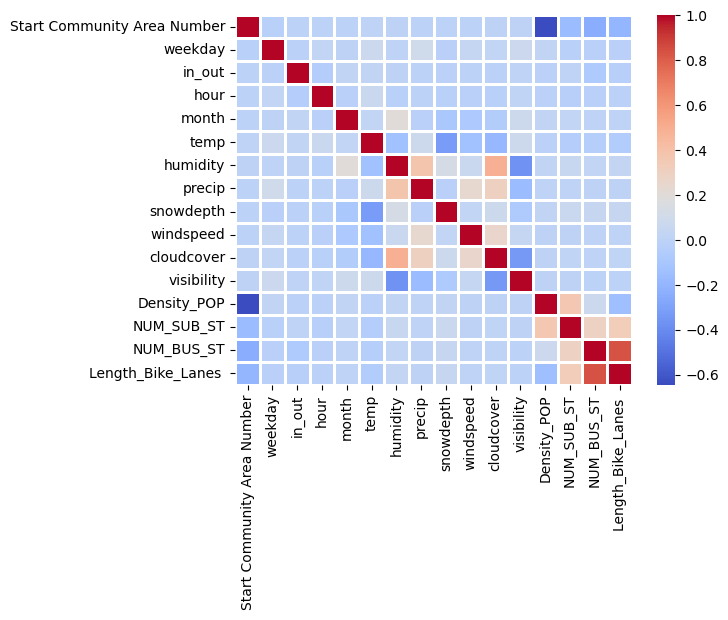

In [189]:
sns.heatmap(pred_destination.corr(), cmap='coolwarm', fmt='.2f', linewidths=1)
plt.show()


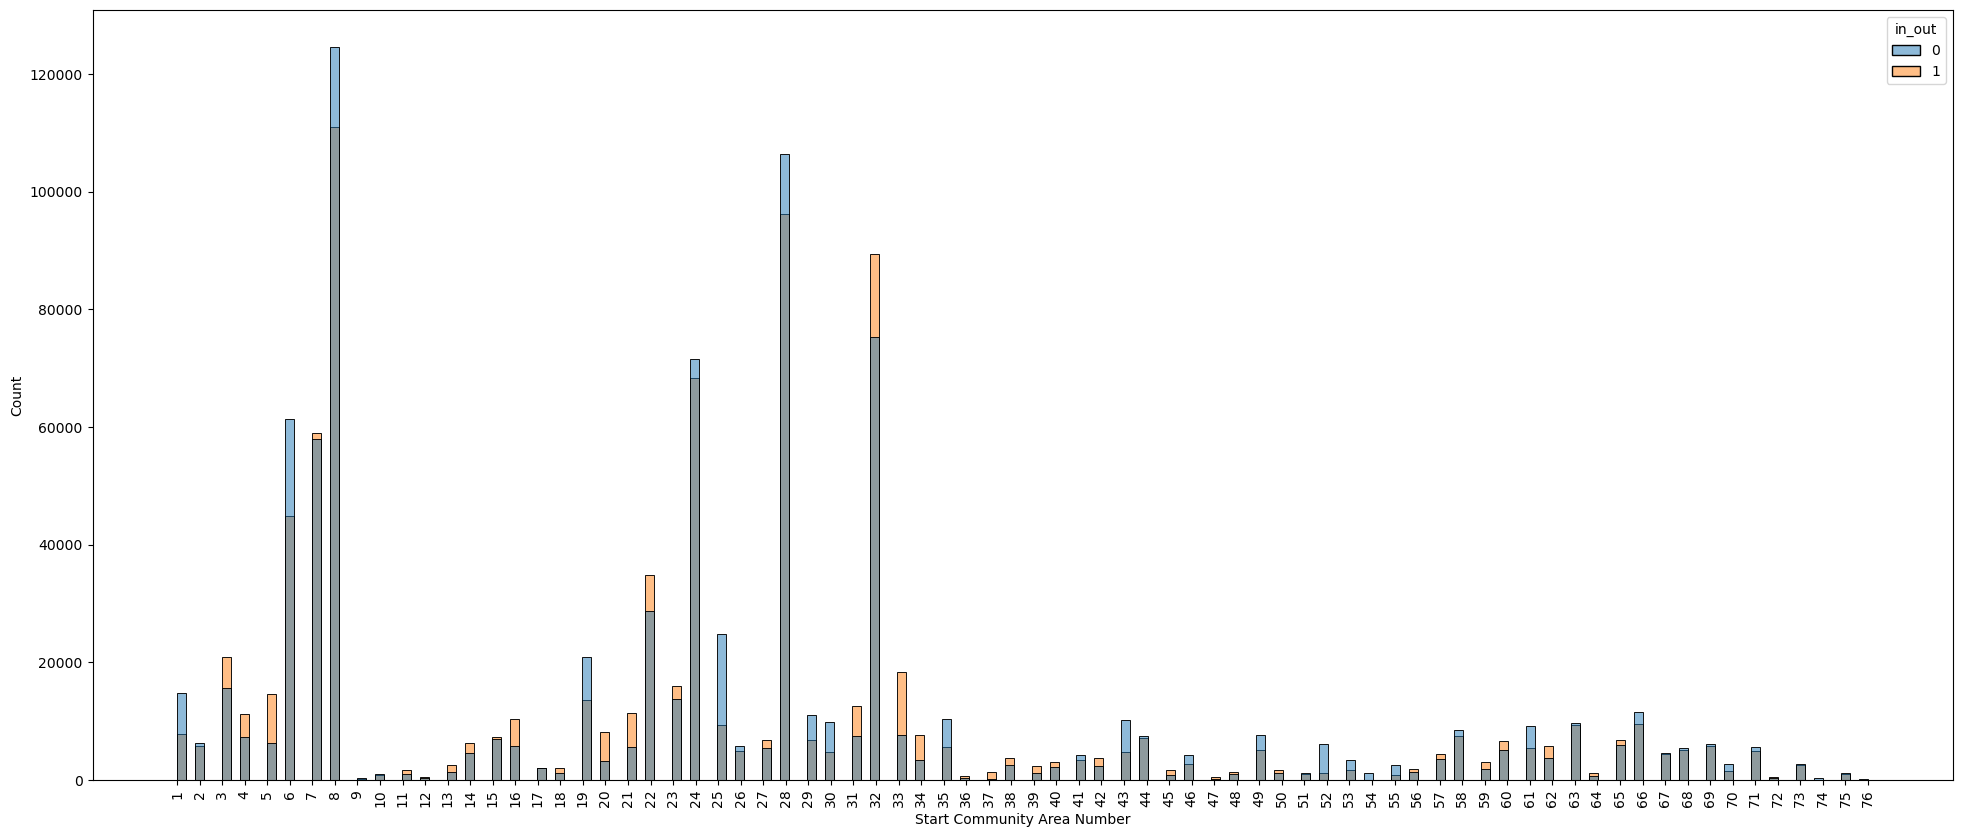

In [190]:
plt.figure(figsize=(24,10))
sns.histplot(data= pred_destination, x='Start Community Area Number',hue='in_out')
community_areas = sorted(pred_destination['Start Community Area Number'].unique())
plt.xticks(community_areas, rotation=90)  # Rotate labels if needed
plt.show()

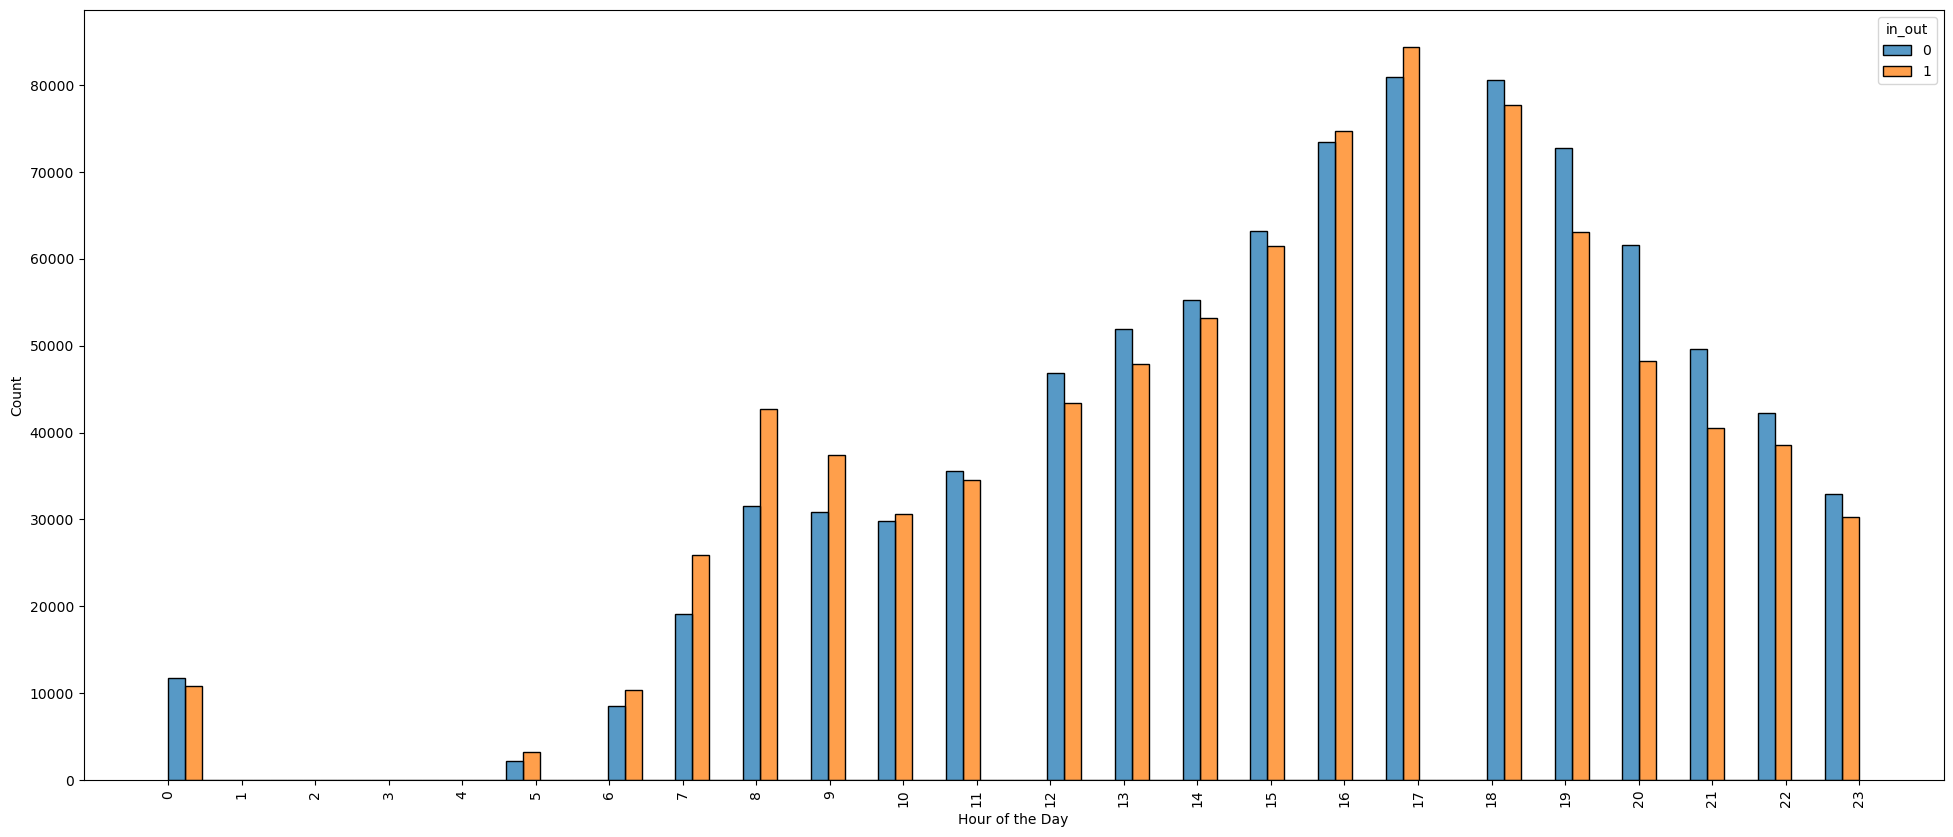

In [191]:
plt.figure(figsize=(24,10))
sns.histplot(data=pred_destination,x='hour',hue='in_out',multiple='dodge',bins=50)
plt.xlabel('Hour of the Day')
hours = sorted(pred_destination['hour'].unique())
plt.xticks(hours, rotation=90)  # Rotate labels if needed
plt.show()

<AxesSubplot:xlabel='temp', ylabel='Count'>

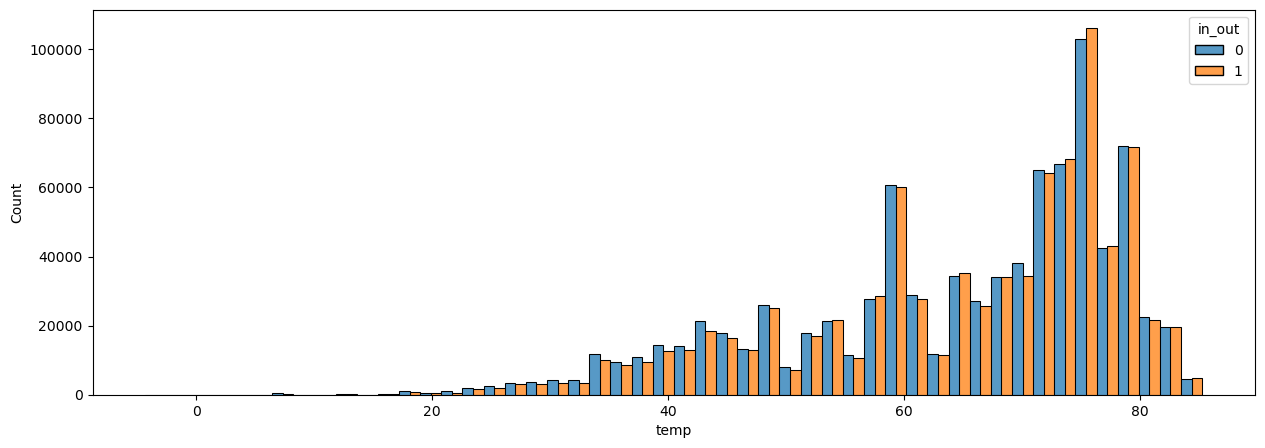

In [192]:
plt.figure(figsize=(15,5))
sns.histplot(data=pred_destination, x='temp',hue='in_out',multiple='dodge',bins=50)

# Chi Square Test

In [193]:
chi_square_data=pred_destination.astype('object')

In [195]:
#Chi square Test
from scipy.stats import chi2_contingency

categorical_columns = chi_square_data.select_dtypes(include='object').columns.tolist()

# Create a dictionary to store the results
chi2_results_list = []

# Perform the chi-squared test for each attribute
for attribute in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(chi_square_data[attribute], chi_square_data['in_out'])
    
    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    

    chi2_results_list.append([attribute, chi2, p])
    
chi2_results_df = pd.DataFrame(chi2_results_list, columns=['Attribute', 'Chi2', 'P-value'])

# Display the results table
print(chi2_results_df)


                      Attribute          Chi2        P-value
0   Start Community Area Number  5.426433e+04   0.000000e+00
1                       weekday  1.046823e+03  6.661020e-223
2                        in_out  1.740226e+06   0.000000e+00
3                          hour  7.537701e+03   0.000000e+00
4                         month  1.391174e+03  9.661366e-292
5                          temp  3.312526e+03   0.000000e+00
6                      humidity  3.301811e+03   0.000000e+00
7                        precip  1.377867e+03  1.313798e-223
8                     snowdepth  3.162596e+02   1.542116e-54
9                     windspeed  2.048060e+03   0.000000e+00
10                   cloudcover  3.707747e+03   0.000000e+00
11                   visibility  4.286151e+02   4.908696e-66
12                  Density_POP  5.426433e+04   0.000000e+00
13                   NUM_SUB_ST  1.870698e+04   0.000000e+00
14                   NUM_BUS_ST  5.316885e+04   0.000000e+00
15           Length_Bike

As noticed chi square > p-value for attributes showing dependence of our target variable (in_out) on the data attributes

# KNN & NB

In [196]:
X = pred_destination.drop(['in_out'],axis=1) 
y = pred_destination['in_out']


normalization: weather + socio-demographic information 

In [197]:
X.columns

Index(['Start Community Area Number', 'weekday', 'hour', 'month', 'temp',
       'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover',
       'visibility', 'Density_POP', 'NUM_SUB_ST', 'NUM_BUS_ST',
       'Length_Bike_Lanes '],
      dtype='object')

In [198]:
x_knn = X.copy()
x_gnb = X.copy()

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# knn
knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn.fit(x_knn, y) 

# gnb
gnb = GaussianNB() 
gnb.fit(x_gnb, y)

# knn
prediction_k = knn.predict(x_knn)

# gnb
prediction_g = gnb.predict(x_gnb)

# putting actual values of target attribute next to the prediction of both classifiers
actual_vs_prediction = pd.concat([y,
                                  pd.DataFrame(prediction_k, index = y.index),
                                  pd.DataFrame(prediction_g, index = y.index)],
                                  axis = 1)
actual_vs_prediction.columns = ['actual_in_out',
                                'knn_predicted_in_out',
                                'gnb_predicted_in_out']

actual_vs_prediction.head(175)

,actual_in_out,knn_predicted_in_out,gnb_predicted_in_out
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,0,0
...,...,...,...
172,1,1,1
173,0,0,0
174,0,0,1
175,0,0,1


In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [201]:
cm_gnb=confusion_matrix(y_true=y,y_pred=prediction_g)
print(cm_gnb)

[[477729 403262]
 [398344 460895]]


In [202]:
accuracy = accuracy_score(y_true=y, y_pred = prediction_g).round(2)

print("Accuracy of gNB classifier:", accuracy)

Accuracy of gNB classifier: 0.54


In [203]:
ind=gnb.classes_
recall = recall_score(y_true=y, y_pred=prediction_g, average= None).round(2)
recal_gnb=pd.Series(data=recall, index=ind)

print("Recall score of gNB classifier for each class :\n\n", recal_gnb)

Recall score of gNB classifier for each class :

 0    0.54
1    0.54
dtype: float64


In [204]:
ind=gnb.classes_
precision = precision_score(y_true=y, y_pred=prediction_g, average= None).round(2)
precision_gnb=pd.Series(data=precision, index=ind)

print("Precision score of gNB classifier for each class :\n\n", precision_gnb)

Precision score of gNB classifier for each class :

 0    0.55
1    0.53
dtype: float64


In [205]:
cm_knn=confusion_matrix(y_true=y,y_pred=prediction_k)
print(cm_knn)

[[569812 311179]
 [339706 519533]]


In [206]:
accuracy = accuracy_score(y_true=y, y_pred = prediction_k).round(2)

print("Accuracy of knn classifier:", accuracy)

Accuracy of knn classifier: 0.63


In [207]:
ind=knn.classes_
precision = precision_score(y_true=y, y_pred=prediction_k, average= None).round(2)
precision_knn=pd.Series(data=precision, index=ind)

print("Precision score of knn classifier for each class :\n\n", precision_knn)

Precision score of knn classifier for each class :

 0    0.63
1    0.63
dtype: float64


Training the models

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train_knn, x_test_knn, y_train, y_test = train_test_split(x_knn, y,test_size = 0.25, random_state=42)
x_train_gnb, x_test_gnb, y_train, y_test = train_test_split(x_gnb, y,test_size = 0.25, random_state=42)

In [210]:
knn.fit(x_train_knn, y_train)
prediction_k = knn.predict(x_test_knn)
print("Accuracy of kNN classifier:", accuracy_score(y_true=y_test, y_pred=prediction_k))

gnb.fit(x_train_gnb, y_train)
prediction_g = gnb.predict(x_test_gnb)
print("Accuracy of gNB classifier:", accuracy_score(y_true=y_test, y_pred=prediction_g))

Accuracy of kNN classifier: 0.5448399983450483
Accuracy of gNB classifier: 0.5400843105976675


In [211]:
cmp_knn=confusion_matrix(y_true=y_test,y_pred=prediction_k)
print(cmp_knn)

[[125618  94752]
 [103269 111419]]


# Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pred_destination.drop([ 'Density_POP', 'NUM_SUB_ST', 'NUM_BUS_ST',
       'Length_Bike_Lanes '],axis=1)
X = data.drop('in_out',axis=1)
y = data['in_out']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Accuracy: 0.56

Confusion Matrix:
[[111066  65299]
 [ 86655  85026]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.59    176365
           1       0.57      0.50      0.53    171681

    accuracy                           0.56    348046
   macro avg       0.56      0.56      0.56    348046
weighted avg       0.56      0.56      0.56    348046



# Random Forests

In [214]:
# random forest

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 


#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# Learn the classifier
RdmF = RandomForestClassifier(n_estimators=500, criterion = "entropy", max_depth=3).fit(X_train, y_train);

print("\n***** Learning performances: *****") 
# make predictions
y_valid = RdmF.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = RdmF.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 


***** Learning performances: *****
Confusion Matrix: 
[[570182  91375]
 [522568 121047]]
Accuracy :  52.96075919495667

***** Prediction performances: *****
Confusion Matrix: 
[[189240  30194]
 [175461  40163]]
Accuracy :  52.72929126691154
